# Introduction

1. Neural Machine Translation (NMT) is the task of using artificial neural network models for translation from one language to the other.
2. The NMT model generally consists of an encoder that encodes a source sentence into a fixed-length vector from which a decoder generates a translation.
3. This problem can be thought as a prediction problem, where given a sequence of words in source language as input, task is to predict the output sequence of words in target language.
4. The dataset comes from http://www.manythings.org/anki/, where you may find tab delimited bilingual sentence pairs in different files based on the source and target language of your choice.
5. For this project, you need to use French - English language pairs just to evaluate the projects uniformly for all students.

In [2]:
import os, sys
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 64
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = 20000
MAX_SENTENCE_LENGTH = 50
MAX_NUM_WORDS = 20000
EMBEDDING_SIZE = 200

In [15]:

input_sentences = []
output_sentences = []
output_sentences_inputs = []

count = 0
for line in open(r"C:\Users\Utkarsh\Desktop\ML-workspace\fra.txt","r"):
    count += 1
    if count > NUM_SENTENCES:
        break
    if '\t' not in line:
        continue
    input_sentence = line.rstrip().split('\t')[0]
    output = line.rstrip().split('\t')[1]

    output_sentence = output + ' '
    output_sentence_input = ' ' + output

    input_sentences.append(input_sentence)
    output_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)

print("Number of sample input:", len(input_sentences))
print("Number of sample output:", len(output_sentences))
print("Number of sample output input:", len(output_sentences_inputs))

Number of sample input: 20000
Number of sample output: 20000
Number of sample output input: 20000


In [17]:
print("English: ",input_sentences[180])
print("French translation: ",output_sentences[180])

English:  Be fair.
French translation:  Soyez honnÃªtes. 


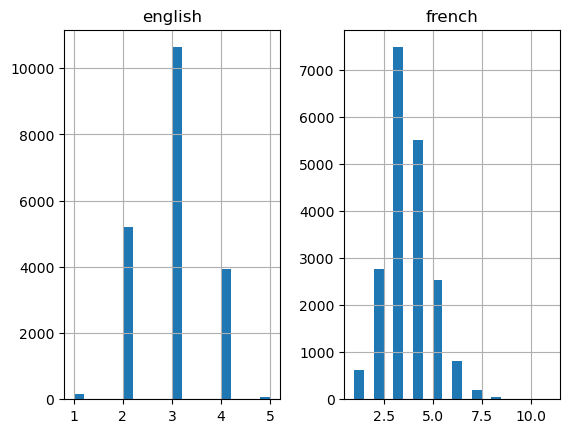

In [18]:
import pandas as pd

eng_len = []
fren_len = []

# populate the lists with sentence lengths
for i in input_sentences:
      eng_len.append(len(i.split()))  

for i in output_sentences:
      fren_len.append(len(i.split()))

length_df = pd.DataFrame({'english':eng_len, 'french':fren_len})

length_df.hist(bins = 20)
plt.show()

In [19]:
input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)
print(input_integer_seq)

word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)

[[17], [17], [17], [17], [552], [552], [121], [121], [121], [121], [121], [121], [121], [121], [121], [121], [121], [121], [121], [121], [121], [121], [52], [1411], [1411], [1411], [1191], [1191], [1191], [597], [55], [699], [699], [641], [641], [50], [50], [50], [104], [104], [104], [104], [104], [104], [104], [756], [756], [17, 43], [17, 43], [17, 43], [407], [407], [407], [407], [407], [407], [1, 68], [1, 68], [1, 79], [1, 171], [1, 171], [1, 171], [832, 33], [380], [380], [380], [380], [380], [380], [380], [380], [380], [380], [380], [380], [553], [553], [553], [255], [598], [598], [598], [598], [190, 4], [190, 4], [190, 4], [190, 4], [1192], [1192], [1192], [1192], [113, 4], [113, 4], [1193], [28, 30], [28, 30], [28, 30], [17, 64], [17, 64], [17, 64], [51, 4], [51, 4], [51, 4], [51, 4], [51, 4], [51, 4], [1721, 36], [1721, 36], [489, 8], [489, 8], [1, 306], [1, 306], [1, 2362], [1, 2363], [1, 2364], [1, 80], [1, 150], [1, 150], [1, 361], [1, 78], [1, 408], [1, 408], [1, 408], [1, 

In [23]:
output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)
print(output_input_integer_seq)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)

[[44, 2], [547], [22, 449, 2], [421, 2], [667, 2], [2657], [2658], [2659], [112, 239, 1180, 20, 239, 1916, 2], [1465, 2], [1917, 2], [668, 2], [2660, 2], [2661, 2], [2658], [2659], [112, 239, 1180, 20, 239, 1916, 2], [1465, 2], [1917, 2], [668, 2], [2660, 2], [2661, 2], [29, 4], [34, 4473], [4474], [4475], [146, 4476], [4477], [4478], [65, 754, 2], [146, 2662], [4479], [4480], [1918], [1918], [34, 2663], [4481], [1466, 2], [299, 2], [358, 2], [1181], [299, 2], [358, 2], [4482], [1181], [1919], [1920], [4483], [4484], [4485], [862, 2], [667, 2], [862, 2], [667, 2], [669], [2657], [1, 1467], [4486], [2664], [15, 385, 2], [1, 74, 1007, 2], [124, 339], [4487, 507, 2], [1182], [1921], [1922], [2665, 2666], [2667, 2668], [42, 1468], [1923, 2], [1183, 2], [2669], [1184, 2], [42, 176], [213], [4488], [2670, 108, 17, 1185], [4489], [1469, 4], [2671, 2], [4490, 2], [146, 4491, 2], [146, 4492], [4493, 2], [4494, 2], [4495, 2], [4496, 2], [1470, 2], [146, 87, 1470, 2], [359, 2], [4497, 2], [4498],

In [20]:
encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[180]:", encoder_input_sequences[180])

encoder_input_sequences.shape: (20000, 5)
encoder_input_sequences[180]: [  0   0   0  22 314]


In [21]:

print(word2idx_inputs["join"])
print(word2idx_inputs["us"])
     

491
57


In [24]:
decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[180]:", decoder_input_sequences[180])

decoder_input_sequences.shape: (20000, 11)
decoder_input_sequences[180]: [  49 1935    0    0    0    0    0    0    0    0    0]


In [25]:
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')


In [26]:
print("decoder_output_sequences.shape:", decoder_output_sequences.shape)


decoder_output_sequences.shape: (20000, 11)


In [28]:
num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
embedding_layer = Embedding(num_words, EMBEDDING_SIZE, input_length=max_input_len)

In [29]:

decoder_targets_one_hot = np.zeros((
        len(input_sentences),
        max_out_len,
        num_words_output
    ),
    dtype='float32'
)
decoder_targets_one_hot.shape

(20000, 11, 9447)

In [30]:

for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [31]:

encoder_inputs = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [32]:

decoder_inputs = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [33]:

decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [34]:
#Compile
model = Model([encoder_inputs,decoder_inputs], decoder_outputs)
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 5, 200)               669200    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 11, 256)              2418432   ['input_2[0][0]']             
                                                                                              

In [36]:

history = model.fit([encoder_input_sequences, decoder_input_sequences], decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_split=0.1,
)

Epoch 1/20
282/282 [==============================] - 97s 311ms/step - loss: 2.4385 - accuracy: 0.7003 - val_loss: 2.2837 - val_accuracy: 0.6617
Epoch 2/20
282/282 [==============================] - 80s 282ms/step - loss: 1.7582 - accuracy: 0.7420 - val_loss: 1.9642 - val_accuracy: 0.7211
Epoch 3/20
282/282 [==============================] - 71s 253ms/step - loss: 1.5462 - accuracy: 0.7767 - val_loss: 1.7769 - val_accuracy: 0.7602
Epoch 4/20
282/282 [==============================] - 73s 259ms/step - loss: 1.3895 - accuracy: 0.8099 - val_loss: 1.6144 - val_accuracy: 0.7955
Epoch 5/20
282/282 [==============================] - 74s 262ms/step - loss: 1.2669 - accuracy: 0.8327 - val_loss: 1.5022 - val_accuracy: 0.8137
Epoch 6/20
282/282 [==============================] - 74s 264ms/step - loss: 1.1795 - accuracy: 0.8454 - val_loss: 1.4323 - val_accuracy: 0.8235
Epoch 7/20
282/282 [==============================] - 73s 261ms/step - loss: 1.1137 - accuracy: 0.8533 - val_loss: 1.3768 - val_ac